In [1]:
import sklearn
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import os
 
for i in (sklearn, np, mpl):
    print(i.__name__,": ",i.__version__,sep="")

sklearn: 0.22
numpy: 1.19.5
matplotlib: 2.1.0


## 6.1 训练和可视化决策树

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# 训练集 鸾尾花
iris = load_iris()
X = iris.data[:,2:]
# 分类目标值
y = iris.target
 
X.shape, y.shape

((150, 2), (150,))

In [3]:
# 决策树分类模型
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
# 训练
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [4]:
from graphviz import Source
from sklearn.tree import export_graphviz

# 存储图片文件夹
image_path = "./images/decision_trees"
# 创建该文件夹
os.makedirs(image_path, exist_ok=True)

# 输出决策树图形
export_graphviz(tree_clf,
               out_file=os.path.join(image_path,"iris_tree.dot"),
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True)

Source.from_file(os.path.join(image_path,"iris_tree.dot"))

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

## 6.2 做出预测

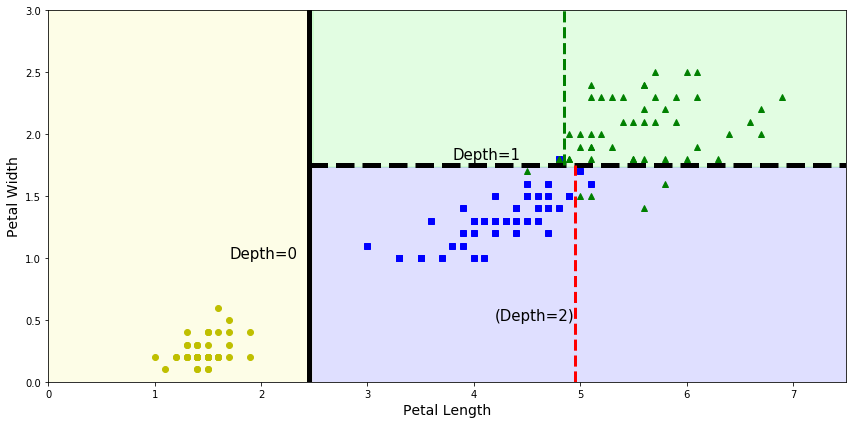

In [7]:
from matplotlib.colors import ListedColormap
 
def plot_decision_boundary(clf, X, y, axes=[0,7.5, 0, 3], iris=True, legend=False, plot_training=True):
    # 测试集 100个样本点
    x1s = np.linspace(axes[0], axes[1],100)
    x2s = np.linspace(axes[2], axes[3],100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    # 预测分类值
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    # 绘制测试集 填充轮廓
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    # 绘制训练集
    if plot_training:
        plt.plot(X[:,0][y==0],X[:,1][y==0],"yo",label="Iris setosa")
        plt.plot(X[:,0][y==1],X[:,1][y==1],"bs",label="Iris versicolor")
        plt.plot(X[:,0][y==2],X[:,1][y==2],"g^",label="Iris virginica")
        plt.axis(axes)

    if iris:
        plt.xlabel("Petal Length", fontsize=14)
        plt.ylabel("Petal Width",fontsize=14)
    else:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contourf(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
        
        plt.xlabel(r"$x_1$",fontsize=18)
        plt.ylabel(r"$x_2$",fontsize=18,rotation=0)
        
    if legend:
        plt.legend(fontsize=14)
    
plt.figure(figsize=(12,6))

# 绘制训练点集、预测值（填充预测边界）
plot_decision_boundary(tree_clf, X, y)
# 标注文字
plt.plot([2.45,2.45],[0,3],"k-",linewidth=5)
plt.text(1.70,1.0,"Depth=0",fontsize=15)
plt.plot([2.45,7.5],[1.75,1.75],"k--",linewidth=5)
plt.text(3.8,1.8,"Depth=1",fontsize=15)
plt.plot([4.85,4.85],[1.75,3],"g--",linewidth=3)
plt.plot([4.955,4.955],[0,1.75],"r--",linewidth=3)
plt.text(4.2,0.5,"(Depth=2)",fontsize=15)
 
plt.tight_layout()
plt.show()

## 6.3 估计类概率

In [8]:
# 预测概率值
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [9]:
# 预测分类值
tree_clf.predict([[5,1.5]])

array([1])

## 6.7 正则化超参数

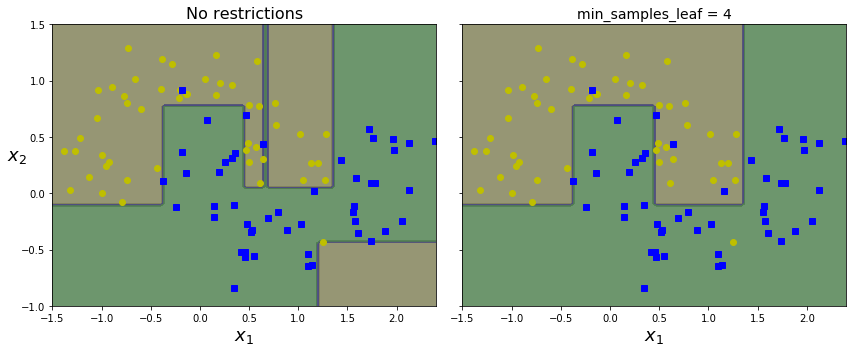

In [10]:
from sklearn.datasets import make_moons

# 训练集 卫星数据集 100个样本 非鸾尾花数据集
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

# 无限制（过拟合）
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf1.fit(Xm, ym)
# 限制 min_samples_leaf=4（减小过拟合）
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf2.fit(Xm, ym)
 
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)

# 左图
plt.sca(axes[0])
# 绘制训练点集、预测值（填充预测边界）
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)

# 右图
plt.sca(axes[1])
# 绘制训练点集、预测值（填充预测边界）
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")
 
plt.tight_layout()
plt.show()

## 6.8 回归

In [11]:
np.random.seed(42)

m=200 
# 训练集 随机生成 200个样本点
X = np.random.rand(m,1)
y = 4 * (X-0.5)**2
# 回归值
y = y + np.random.randn(m,1)/10
 
X.shape, y.shape

((200, 1), (200, 1))

In [12]:
from sklearn.tree import DecisionTreeRegressor

# 决策树回归模型
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
# 训练
tree_reg.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [13]:
# 输出决策树图形
export_graphviz(tree_reg,
               out_file=os.path.join(image_path,"regression_tree.dot"),
               feature_names=["x1"],
               rounded=True,
               filled=True)
Source.from_file(os.path.join(image_path,"regression_tree.dot"))

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

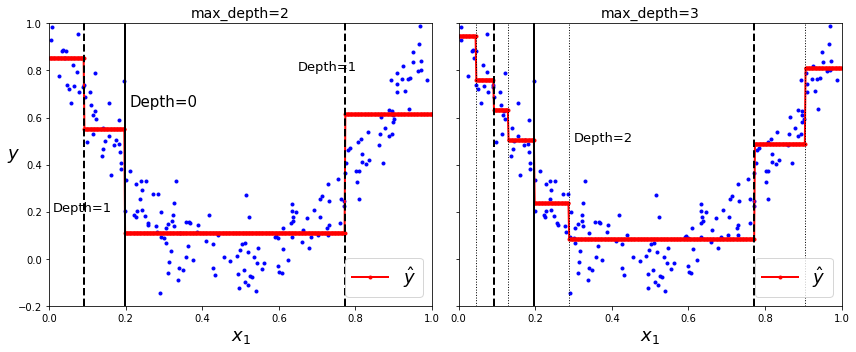

In [14]:
# 限制更大 max_depth=2（减小过拟合）
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg1.fit(X,y)
# 限制更小 max_depth=3
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg2.fit(X,y)

def plot_regression_predictions(tree_reg, X, y, axes=[0,1,-0.2,1], ylabel="$y$"):
    # 测试集
    x1 = np.linspace(axes[0], axes[1],500).reshape(-1,1)
    # 预测价值
    y_pred = tree_reg.predict(x1)
    
    plt.axis(axes)
    plt.xlabel("$x_1$",fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    
    # 绘制训练集
    plt.plot(X,y,"b.")
    # 绘制预测值
    plt.plot(x1, y_pred, "r.-",linewidth=2, label=r"$\hat{y}$")
    
fig, axes = plt.subplots(ncols=2,figsize=(12,5),sharey=True)

# 左图
plt.sca(axes[0])
# 绘制训练集、预测值（画出预测直线）
plot_regression_predictions(tree_reg1, X, y)
# 分割层
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
    
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(fontsize=18)
plt.title("max_depth=2", fontsize=14)

# 右图
plt.sca(axes[1])
# 绘制训练集、预测值（画出预测直线）
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
# 分割层
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)

plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.legend(fontsize=18)
plt.title("max_depth=3",fontsize=14)

plt.tight_layout()
plt.show()

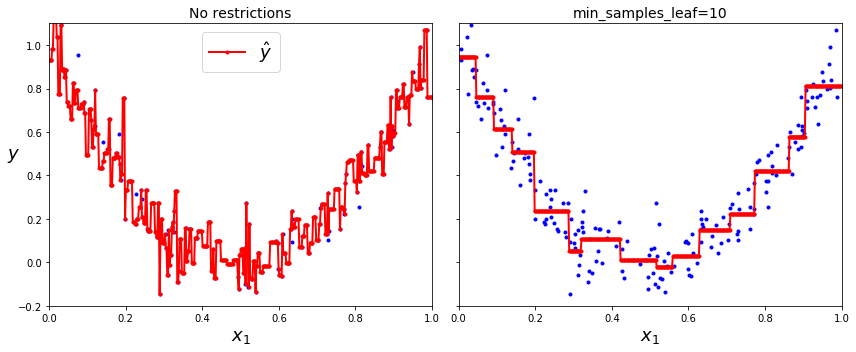

In [15]:
# 无限制（过拟合）
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg1.fit(X, y)
# 限制 min_samples_leaf=10（减小过拟合）
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg2.fit(X, y)

# 测试集
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
# 预测 - 无限制
y_pred1 = tree_reg1.predict(x1)
# 预测 - 限制
y_pred2 = tree_reg2.predict(x1)
 
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)

# 左图
plt.sca(axes[0])
# 绘制训练集
plt.plot(X, y, "b.")
# 绘制预测值（画出预测直线）
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

# 右图
plt.sca(axes[1])
# 绘制训练集
plt.plot(X, y, "b.")
# 绘制预测值（画出预测直线）
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)
 
plt.tight_layout()
plt.show()

## 6.9 不稳定性

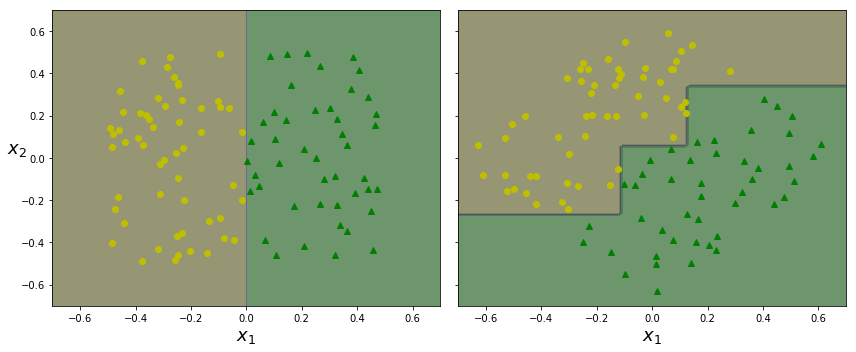

In [16]:
# 对旋转敏感

# 训练集 随机生成 100个样本点
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
# 回归值
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

# 45°
angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
# 旋转训练集
Xsr = Xs.dot(rotation_matrix)

# 旋转前
tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
# 旋转后
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)
 
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)
# 左图
plt.sca(axes[0])
# 绘制训练集、预测值（填充预测边界）
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
# 右图
plt.sca(axes[1])
# 绘制训练集、预测值（填充预测边界）
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")
 
plt.tight_layout()
plt.show()

In [28]:
# 对小变化敏感

# 训练集 鸾尾花
iris = load_iris()
X = iris.data[:,2:]
# 分类目标值
y = iris.target

# 花瓣最宽的Iris versicolor
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower
# 从数据集中删除花瓣最宽的数据
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)

# 变化后的训练集
X_tweaked = X[not_widest_versicolor]
# 变化后的目标值
y_tweaked = y[not_widest_versicolor]

# 决策树分类模型
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
# 训练
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

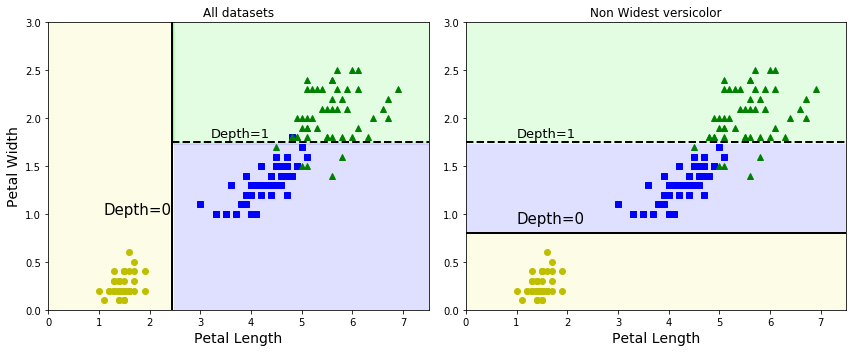

In [27]:
plt.figure(figsize=(12,5))

# 左图 变化前
plt.subplot(121)
# 绘制训练集、预测值（填充预测边界）
plot_decision_boundary(tree_clf, X, y, legend=False)
plt.title("All datasets")
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.10, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)

# 右图 变化后
plt.subplot(122)
# 绘制训练集、预测值（填充预测边界）
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)
plt.ylabel("")
plt.title("Non Widest versicolor")

plt.tight_layout()
plt.show()